# Text Preprocessing

Suppose we have textual data available, we need to apply many of preprocessing steps to the data to transform those words into numerical features that works with machine learning algorithms.

The pre-processing steps for the problem depend mainly on the domain and the problem itself. We don't need to apply all the steps for every problem.

Here, we're going to see text preprocessing in Python. We'll use NLTK(Natural Language ToolKit) library here.

In [2]:
# Import necessary libraries
import nltk
import string
import re

### Text Lowercase

We do lowercase the text to reduce the size of the vocabulary of our text data.

In [3]:
def lowercase_text(text):
    return text.lower()


input_str = "Weather is too Cloudy.Possiblity of Rain is High,Today!!"
lowercase_text(input_str)

'weather is too cloudy.possiblity of rain is high,today!!'

### Remove numbers

We should either remove the numbers or convert those numbers into textual representations. We use regular expressions(re) to remove the numbers.

In [4]:
# For Removing Numbers
def remove_num(text):
    result = re.sub(r'\d+', '', text)
    return result


input_str = "You bought 6 candies from shop, and 4 candies are in home."
remove_num(input_str)

'You bought  candies from shop, and  candies are in home.'

As we mentioned above, you can also convert the numbers into words. This could be done by using the inflect.

In [5]:
!pip install inflect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# Import the Library
import inflect
q = inflect.engine()

# convert number into text
def convert_num(text):
    # split string into list of text
    temp_string = text.split()
    # initialise empty list
    new_str = []
    
    for word in temp_string:
        # if text is a digit, convert the digit
        # to numbers and append into the new_str list
        
        if word.isdigit():
            temp = q.number_to_words(word)
            new_str.append(temp)
            
        # append the texts as it is
        else:
            new_str.append(word)
    # join the texts of new str to form a string
    temp_str = ' '.join(new_str)
    return temp_str


input_str = "You bought 6 candies from shop, and 4 candies are in home."
convert_num(input_str)

'You bought six candies from shop, and four candies are in home.'

In [7]:
### Remove Punctuation
def rem_punct(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

input_str = "Hey, Are you excited??, After a week, we will be in Shimla!!!"
rem_punct(input_str)

'Hey Are you excited After a week we will be in Shimla'

In [8]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

### Remove default stopwords:

Stopwords are words that do not contribute to the meaning of the sentence. Hence, they can be safely removed without causing any change in the meaning of a sentence. The NLTK(Natural Language Toolkit) library has the set of stopwords and we can use these to remove stopwords from our text and return a list of word tokens.

In [9]:
# importing nlkt library
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
# remove stopwords function
def rem_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in string.punctuation]
    filtered_text = [word for word in filtered_text if word not in stop_words]
    return filtered_text


ex_text = "Data is the new oil. A.I is the last invention"
rem_stopwords(ex_text)

['Data', 'new', 'oil', 'A.I', 'last', 'invention']

### Stemming

From Stemming we will process of getting the root from of a word. Root or Stem is the part to which inflextional affixes(like -ed, -ize, etc) are added. We  would create the stem words by removing the pefix of a word. So, stemming a word may not result in actual words.

Boys ----> Boy

going ---> go

If our sentences are not in tokens, then we need to convert it into tokens. After we converting strings of text into tokens, then we can convert those word tokens into their root from. These are the Porter stemmer, the snowball stemmer, and the Lancaster. We usually use Porter stemmer among them.


In [11]:
# importing nltk's porter stemmer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
steml = PorterStemmer()

# stem words in the list of tokenised words
def s_words(text):
    word_tokens = word_tokenize(text)
    stems = [steml.stem(word) for word in word_tokens]
    return stems

text = 'Data is the new revolution in the word, in a day one individual would generate terabytes of data'
s_words(text)

['data',
 'is',
 'the',
 'new',
 'revolut',
 'in',
 'the',
 'word',
 ',',
 'in',
 'a',
 'day',
 'one',
 'individu',
 'would',
 'gener',
 'terabyt',
 'of',
 'data']

### Lemmatization

As stemming, lemmantization do the same but the only difference is that lemmatization ensurea that root word belongs to the language. Because of the use of lemmatization we will get the valid words. In NLTK,we use WordLennatizer to get the lemmas of words. We also need to provide a context for the lemmatixzation. So, we added pos(parts-of-speech) as a parameter.

In [14]:
from nltk.stem import wordnet
from nltk.tokenize import word_tokenize
lemma = wordnet.WordNetLemmatizer()
nltk.download('wordnet')
# lemmatize string
#lemmatize string
def lemmatize_word(text):
    word_tokens = word_tokenize(text)
    # provide context i.e. part of speech(pos)
    lemmas = [lemma.lemmatize(word, pos='v') for word in word_tokens]
    return lemmas


text = 'Data is the new revolution in the word, in a day one individual would generate terabytes of data'
lemmatize_word(text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['Data',
 'be',
 'the',
 'new',
 'revolution',
 'in',
 'the',
 'word',
 ',',
 'in',
 'a',
 'day',
 'one',
 'individual',
 'would',
 'generate',
 'terabytes',
 'of',
 'data']

In [13]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

### Part of Speech(POS) Tagging

The POS explain you how a word is used in asentence. In the sentence, a word have different contexts and semantic meanings. The basis natural language preprocessing(NLP) models like bag-of-words(bow) fails to identify these  relation the words. For that we use pos tagging to mark a word to its pos tag based on its context in the data. POS is also used to extract relationship between the words.

In [15]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [16]:
# importing tokenize library
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

# convert text into word_token with their tags
def pos_tagg(text):
    word_tokens = word_tokenize(text)
    return pos_tag(word_tokens)

pos_tagg('Are you afraid of something?')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Are', 'NNP'),
 ('you', 'PRP'),
 ('afraid', 'IN'),
 ('of', 'IN'),
 ('something', 'NN'),
 ('?', '.')]

In [19]:
# downloading the tarset
nltk.download('tagsets')

# extract information about the tag
nltk.help.upenn_tagset('PRP')

PRP: pronoun, personal
    hers herself him himself hisself it itself me myself one oneself ours
    ourselves ownself self she thee theirs them themselves they thou thy us


[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


### Chunking

Chunking is the process of extracting phrases from the Unstructured text and give them more structure to it. We also called them shallow parsing. We can do it on top of pos tagging. It groups words into chunks mainly for noun phrases. Chunking we do by using regular expression.


In [20]:
# importing libraries
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# here we define chunking function with text and rwegular
# expression respresenting grammer as parameter
def chunking(text, grammar):
    word_tokens = word_tokenize(text)
    
    # label words with pos
    word_pos = pos_tag(word_tokens)
    
    # create chunk parser using grammar
    chunkParser = nltk.RegexpParser(grammar)
    
    # text it on the list of word token with tagged pos
    tree = chunkParser.parse(word_pos)
    
    for subtree in tree.subtrees():
        print(subtree)
    # tree.draw()
    

sentence = 'the little re parrot is flying in the sky'
grammar = "NP: {<DT>?<JJ>*<NN>}"
chunking(sentence, grammar)

(S
  (NP the/DT little/JJ re/JJ parrot/NN)
  is/VBZ
  flying/VBG
  in/IN
  (NP the/DT sky/NN))
(NP the/DT little/JJ re/JJ parrot/NN)
(NP the/DT sky/NN)


### Named Entity Recognition

It is used to extract information from unstructured text. It is used to classy which is present in the text into categories like a person, organization, event, places, etc. This will give you a details knowledge about the text and the relationship between the difference entities.

In [21]:
# Importing tokenization and chunk
from nltk.tokenize import word_tokenize
from nltk import pos_tag, ne_chunk
nltk.download('maxent_ne_chunker')
nltk.download('words')

def ner(text):
  # tokenize the text
  word_tokens = word_tokenize(text)

  # pos tagging of words
  word_pos = pos_tag(word_tokens)

  #tree of word entities
  print(ne_chunk(word_pos))


text = 'Brain Lara scored the highest 400 runs in a test match which played in between WI and England.'
ner(text)

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...


(S
  (PERSON Brain/NNP)
  (PERSON Lara/NNP)
  scored/VBD
  the/DT
  highest/JJS
  400/CD
  runs/NNS
  in/IN
  a/DT
  test/NN
  match/NN
  which/WDT
  played/VBD
  in/IN
  between/IN
  (ORGANIZATION WI/NNP)
  and/CC
  (GPE England/NNP)
  ./.)


[nltk_data]   Unzipping corpora/words.zip.


### RegEx 

import re

- re library in Python is used for string searching and manipulation.
- We also used it frequently for web scraping

In [22]:
import re
sent = "dataset, Data is a new fuel"
r2 = re.findall(r"^\w+",sent)
print(r2)

['dataset']


- Note: If we remove '+' sign from 'w. the output will change and it will give only first character of the first letter, i.e[i]

#### Example of \s ex[ression in re.split function
- "s." This expression we use for creating a space in the string.

To understand better this expression we will use the split function in a sample example. In this example, we have to split each words using the "re.split" function and at the same time we have used \s that allows to parse each word in the string seperately.

In [23]:
import re

print((re.split(r'\s','We splited this sentence')))

['We', 'splited', 'this', 'sentence']


As we can see above we got the output ['We','splited','this','sentence'] but what if we remove'\' from '\s'. it will give result like remove 's' from the entire sentence.

In [24]:
import re

print((re.split(r's', 'We splited this sentence')))

['We ', 'plited thi', ' ', 'entence']


### Use RegEx methods
The re packages provide several methods to actually perform queries on an input string. We will see different methods which are 

    re.match()
    re.search()
    re.findall()

    

### Using re.match()

The match function is used to match the RegEx pattern to string with optional flag. Here, is this "W+" and "\W" will match the words starting from 'i' and thereafter, anything which is not started with 'i' is not identified. For checking match for elements in the list or string, we run the loop.

In [29]:
import re

lists = ['icecream images', 'i immitated', 'inner peace']

for i in lists:
  q = re.match("(i\w+)\W(i\w+)", i)

  if q:
    print((q.groups()))

('icecream', 'images')


### Use re.search()

A RegEx is commonly used to search for a pattern in the text. This methods takes a RegEx pattern and a string and searches that pattern with the using.

 For using re.search() function you need to import re first. The search() function takes the pattern and text to scan from our given string and retruns the match object when the pattern found or else or not match.

In [32]:
import re

pattern = ["playing","dataset"]
text = "Raju is playing outside."

for p in pattern:
  print("You're looking for '%s' in '%s'" %(p, text), end=' ')

  if re.search(p, text):
    print('Found match!')

  else:
    print('no match found!')

You're looking for 'playing' in 'Raju is playing outside.' Found match!
You're looking for 'dataset' in 'Raju is playing outside.' no match found!


### Use re.findall()

We use re.findall() module is when you want to iterate over the line of the file, it'll do like list all the matches in one go. Here in a example, we  would like to fetch email address from the list and we want all emails from lists, we use re.findall() method.

In [33]:
import re

kgf = "Abc@gmail.com, XYX@gmail.com, lmn#gmail.com, efg@gmail.com"

emails = re.findall(r'[\w\.]+@[\w\.]+', kgf)

for e in emails:
  print(e)

Abc@gmail.com
XYX@gmail.com
efg@gmail.com


## Text Normalization

In the text pre-processing highly overlooked step is text normalization. The text normalization means the process of transforming the text into the canonical(or standard) from. Like "ok" and "k" can be transformed to "okay". its canonical form. And another example is mapping of  near identical words such as "preprocessing", "pre-processing" and "pre processing" to just "preprocessing".
### Later Undertands this.

## TOKENIZERS

#### NLTK

In [34]:
!pip install --user -U nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
from nltk.tokenize.regexp import WhitespaceTokenizer
m = "'There is no need to panic. We need to work together, take small yet important measures to ensure self-protection the Prime Minister tweeted'"

In [37]:
from nltk.tokenize import word_tokenize
text = """Founded in 2002, SpaceX's mission is to enable humans to become a spacefaring civilization and multi-planet 
species by building a self-sustaining city on Marsh. In 2008, SpaceX's Falcon l became the first privately developed
liquid-fuel launch vehicle to orbit the Earth."""

word_tokenize(text)

['Founded',
 'in',
 '2002',
 ',',
 'SpaceX',
 "'s",
 'mission',
 'is',
 'to',
 'enable',
 'humans',
 'to',
 'become',
 'a',
 'spacefaring',
 'civilization',
 'and',
 'multi-planet',
 'species',
 'by',
 'building',
 'a',
 'self-sustaining',
 'city',
 'on',
 'Marsh',
 '.',
 'In',
 '2008',
 ',',
 'SpaceX',
 "'s",
 'Falcon',
 'l',
 'became',
 'the',
 'first',
 'privately',
 'developed',
 'liquid-fuel',
 'launch',
 'vehicle',
 'to',
 'orbit',
 'the',
 'Earth',
 '.']

- Note- in the above we had used a sligtly different syntax for importing the module. You'll rewcognize by now the varible assignment.

In [40]:
tokens = WhitespaceTokenizer().tokenize(m)
print(len(tokens))

23


In [41]:
tokens

["'There",
 'is',
 'no',
 'need',
 'to',
 'panic.',
 'We',
 'need',
 'to',
 'work',
 'together,',
 'take',
 'small',
 'yet',
 'important',
 'measures',
 'to',
 'ensure',
 'self-protection',
 'the',
 'Prime',
 'Minister',
 "tweeted'"]

In [42]:
my_vocab = set(tokens)
print(len(tokens))

23


In [43]:
my_vocab

{"'There",
 'Minister',
 'Prime',
 'We',
 'ensure',
 'important',
 'is',
 'measures',
 'need',
 'no',
 'panic.',
 'self-protection',
 'small',
 'take',
 'the',
 'to',
 'together,',
 "tweeted'",
 'work',
 'yet'}

In [56]:
my_st= "'There is no need to panic. We need to work together, take small yet important measures to ensure self-protection,' the Prime Minister tweeted."

We will imput different tokenizer.

In [45]:
from nltk.tokenize.regexp import WordPunctTokenizer

Above tokenizer also split the words into tokens.

In [57]:
m_t = WordPunctTokenizer().tokenize(my_st)

print(len(m_t))

30


In [58]:
m_t

["'",
 'There',
 'is',
 'no',
 'need',
 'to',
 'panic',
 '.',
 'We',
 'need',
 'to',
 'work',
 'together',
 ',',
 'take',
 'small',
 'yet',
 'important',
 'measures',
 'to',
 'ensure',
 'self',
 '-',
 'protection',
 ",'",
 'the',
 'Prime',
 'Minister',
 'tweeted',
 '.']

In [59]:
my_vocab = set(m_t)
print(len(my_vocab))

26


In [60]:
my_vocab

{"'",
 ',',
 ",'",
 '-',
 '.',
 'Minister',
 'Prime',
 'There',
 'We',
 'ensure',
 'important',
 'is',
 'measures',
 'need',
 'no',
 'panic',
 'protection',
 'self',
 'small',
 'take',
 'the',
 'to',
 'together',
 'tweeted',
 'work',
 'yet'}

What is the difference between the above approaches? In the first one, vocabulary ends up containing "words" and "words." as two distinct words; whereas in second example"words" is a token type and ","(i.e. the dot) is split into a seperate token and this results into a  new tokens type in addition to 'words".

In [68]:
from nltk.tokenize import sent_tokenize
text = """Founded in 2002, SpaceX's mission is to enable humans to become a spacefaring civilization and multi-planet 
species by building a self-sustaining city on Marsh. In 2008, SpaceX's Falcon l became the first privately developed
liquid-fuel launch vehicle to orbit the Earth."""
sent_tokenize(text)

["Founded in 2002, SpaceX's mission is to enable humans to become a spacefaring civilization and multi-planet \nspecies by building a self-sustaining city on Marsh.",
 "In 2008, SpaceX's Falcon l became the first privately developed\nliquid-fuel launch vehicle to orbit the Earth."]

## Frequency Distribution

What is frequency distribution? This is basically counting words in your text. To give a brief example of how it works.

In [69]:
# from nltk.book import
import nltk
# nltk.download('guteberg')
print("\n\n\n")
textl = "'There is no need to panic. We need to work together, take small yet important measures to ensure self-protection,' the Prime Minister tweeted."
freqDist = nltk.FreqDist(word_tokenize(textl))
print(freqDist)





<FreqDist with 23 samples and 28 outcomes>


The class FreqDist works like a dictionary where keys are the words in the text and the values are count associated with that word. For example, if you want to see how many words "person" are in the test you can type as

In [71]:
print(freqDist["person"])

0


One of the most important in FreqDist is the .keys()function. Lets us see what will it give in a below code:

In [72]:
words = freqDist.keys()
print(type(words))

<class 'dict_keys'>


After running above code, it'll give as class 'dict_keys' in the other words, you get a list of all the words in your text.

And you want to see how many words are there in the text,

In [73]:
print(len(words))

23


In the class nltk.text. Text function do the same stuff, so what is the difference? The difference is that with freqDist you can create your own text without the necessity of converting your text to nltk.text Text class.

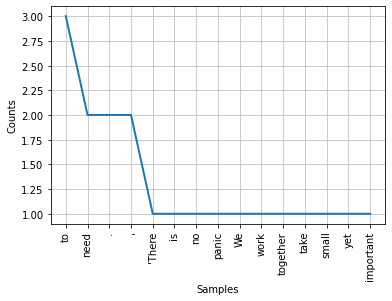

In [74]:
freqDist.plot(15)

## Personal Frequency Distribution

Suppose you want to do frequency distribution based on your own personal text. Let's get started.

In [75]:
from nltk import FreqDist

sent = "'There is no need to panic. We need to work together, take small yet important measures to ensure self-protection,' the Prime Minister tweeted."

text_list = sent.split(" ")

freqDist = FreqDist(text_list)
words = list(freqDist.keys())

print(freqDist['need'])

2


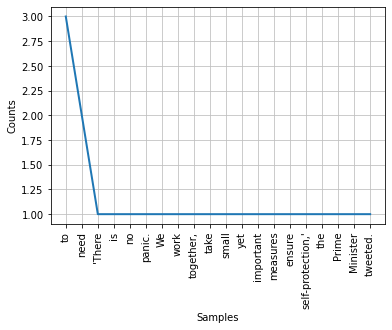

In [76]:
freqDist.plot(20)